<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

<h1>Clustering analysis using KMeans<span class="tocSkip"></span></h1>

This notebook provides a simple wrapper function to Sklearn's KMeans algorithm to help:
* Build multiple KMeans models with different number of clusters
* Visualize clustering outcomes
* Export cluster assignments and summary statistics to Excel

**The code for this template was adapted from SQUAD's Sphinx tool for Clustering analysis: https://owlabs.atlassian.net/wiki/spaces/SQUADSPHINX/overview**. At the bottom of this linked page, you can find additional reading materials on Clustering, including an example with the same data as used in the Notebook.

<h2>Table of Contents<span class="tocSkip"></span></h2>
<ul class="toc-item"><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in data</a></span><ul class="toc-item"><li><span><a href="#Pre-processing-comments" data-toc-modified-id="Pre-processing-comments-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pre-processing comments</a></span></li></ul></li><li><span><a href="#Perform-K-means-analysis-for-a-specific-number-of-clusters" data-toc-modified-id="Perform-K-means-analysis-for-a-specific-number-of-clusters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Perform K-means analysis for a specific number of clusters</a></span><ul class="toc-item"><li><span><a href="#Obtain-key-information-about-the-clusters" data-toc-modified-id="Obtain-key-information-about-the-clusters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Obtain key information about the clusters</a></span></li><li><span><a href="#Examining-the-cluster-characteristics-on-more-variables-and-metrics" data-toc-modified-id="Examining-the-cluster-characteristics-on-more-variables-and-metrics-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Examining the cluster characteristics on more variables and metrics</a></span></li><li><span><a href="#Applying-the-trained-K-means-model-to-assign-clusters-to-new-data" data-toc-modified-id="Applying-the-trained-K-means-model-to-assign-clusters-to-new-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Applying the trained K-means model to assign clusters to new data</a></span></li></ul></li><li><span><a href="#Perform-K-means-analysis-for-a-range-of-clusters" data-toc-modified-id="Perform-K-means-analysis-for-a-range-of-clusters-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Perform K-means analysis for a range of clusters</a></span><ul class="toc-item"><li><span><a href="#Exploring-results-in-depth" data-toc-modified-id="Exploring-results-in-depth-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Exploring results in depth</a></span></li></ul></li><li><span><a href="#Larger-datasets-using-MiniBatch-KMeans" data-toc-modified-id="Larger-datasets-using-MiniBatch-KMeans-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Larger datasets using MiniBatch KMeans</a></span><ul class="toc-item"><li><span><a href="#Perform-MiniBatch-KMeans-for-a-range-of-cluster" data-toc-modified-id="Perform-MiniBatch-KMeans-for-a-range-of-cluster-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Perform MiniBatch KMeans for a range of cluster</a></span></li></ul></li></ul>

**We start by loading in Python libraries used in this code**

In [1]:
# Load in Python libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

sns.set_style("white")

In [2]:
# Developer utility that automatically reads in changes to custom functions that are imported (see below)
%load_ext autoreload
%autoreload 2

In [3]:
# Add path of the folder 'resources' to the path from which we can import modules  
import sys
sys.path.append('../../utilities')


# Read in data

**This dataset contains soccer player attributes from the FIFA soccer game**

In [4]:
# Load in the data
soccer_data = pd.read_csv("sample_inputs/soccer.csv")

In [5]:
# Look at the top 10 rows
pd.set_option('display.max_columns', None) # Show all columns -- only use if needed and data is not extremely wide
soccer_data.head(10)

,player_api_id,player_name,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,foot,attack_work_rate,defense_work_rate,height,weight,attacking,skill,movement,power,mentality,defending,goalkeeping,avg,fix_crossing,fix_short_passing,fix_finishing,fix_volleys,fix_heading_accuracy,fix_dribbling,fix_curve,fix_free_kick_accuracy,fix_long_passing,fix_ball_control,fix_acceleration,fix_sprint_speed,fix_agility,fix_reactions,fix_balance,fix_shot_power,fix_jumping,fix_stamina,fix_strength,fix_long_shots,fix_aggression,fix_interceptions,fix_positioning,fix_vision,fix_penalties,fix_marking,fix_standing_tackle,fix_sliding_tackle,fix_gk_diving,fix_gk_handling,fix_gk_kicking,fix_gk_positioning,fix_gk_reflexes
0,2625,"Patryk Rachwal,18",60.5,61.0,50.0,47.0,46.0,53.0,38.0,56.0,50.0,50.0,66.0,58.0,67.0,63.0,67.0,49.0,76.0,68.0,56.0,77.0,56.0,58.0,71.0,64.0,49.0,55.0,66.0,63.0,63.0,54.0,12.0,11.0,6.0,8.0,8.0,1.0,2.0,1,175.26,154,46.8,56.0,64.4,63.0,61.0,60.000000,9.0,50.939394,-0.939394,2.060606,-3.939394,-12.939394,-4.939394,5.060606,-0.939394,-0.939394,15.060606,7.060606,16.060606,12.060606,16.060606,-1.939394,25.060606,17.060606,5.060606,26.060606,5.060606,7.060606,20.060606,13.060606,-1.939394,4.060606,15.060606,12.060606,12.060606,3.060606,-38.939394,-39.939394,-44.939394,-42.939394,-42.939394
1,2752,Diego Mainz,70.0,71.0,36.0,37.0,72.0,55.0,20.0,45.0,30.0,16.0,60.0,56.0,39.0,34.0,43.0,62.0,42.0,57.0,55.0,59.0,84.0,17.0,82.0,72.0,31.0,52.0,35.0,74.0,73.0,65.0,11.0,6.0,7.0,9.0,15.0,1.0,2.0,1,187.96,174,44.0,41.4,44.0,54.4,54.4,70.666667,9.6,43.969697,-7.969697,11.030303,-6.969697,-23.969697,28.030303,1.030303,-13.969697,-27.969697,16.030303,12.030303,-4.969697,-9.969697,-0.969697,18.030303,-1.969697,13.030303,11.030303,15.030303,40.030303,-26.969697,38.030303,28.030303,-12.969697,8.030303,-8.969697,30.030303,29.030303,21.030303,-32.969697,-37.969697,-36.969697,-34.969697,-28.969697
2,2768,Jose Dorado,72.0,73.0,42.0,42.0,69.0,68.0,28.0,39.0,53.0,19.0,56.0,58.0,57.0,55.0,58.0,72.0,61.0,38.0,77.0,52.0,70.0,20.0,62.0,78.0,38.0,57.0,25.0,74.0,73.0,81.0,11.0,14.0,12.0,13.0,9.0,-1.0,2.0,1,180.34,154,49.8,45.0,60.6,51.4,52.0,76.000000,11.8,47.909091,-5.909091,20.090909,-5.909091,-19.909091,21.090909,-8.909091,5.090909,-28.909091,8.090909,10.090909,9.090909,7.090909,10.090909,24.090909,13.090909,-9.909091,29.090909,4.090909,22.090909,-27.909091,14.090909,30.090909,-9.909091,9.090909,-22.909091,26.090909,25.090909,33.090909,-36.909091,-33.909091,-35.909091,-34.909091,-38.909091
3,2770,Ignacio Gonzalez,71.0,72.0,62.0,68.0,71.0,72.0,69.0,71.0,84.0,71.0,70.0,76.0,63.0,54.0,63.0,65.0,62.0,72.0,56.0,47.0,61.0,74.0,56.0,41.0,70.0,73.0,69.0,33.0,43.0,25.0,12.0,13.0,6.0,14.0,15.0,1.0,2.0,1,180.34,161,68.4,74.4,61.4,62.0,61.8,33.666667,12.0,54.575758,7.424242,17.424242,13.424242,14.424242,16.424242,16.424242,29.424242,16.424242,15.424242,21.424242,8.424242,-0.575758,8.424242,10.424242,7.424242,17.424242,1.424242,-7.575758,6.424242,19.424242,1.424242,-13.575758,15.424242,18.424242,14.424242,-21.575758,-11.575758,-29.575758,-42.575758,-41.575758,-48.575758,-40.575758,-39.575758
4,2790,Alberto Rey,71.0,76.0,71.0,37.0,55.0,68.0,43.0,64.0,67.0,56.0,71.0,67.0,71.0,71.0,65.0,69.0,67.0,46.0,61.0,75.0,72.0,42.0,67.0,60.0,62.0,60.0,54.0,77.0,77.0,69.0,8.0,21.0,71.0,21.0,21.0,-1.0,0.0,1,175.26,163,54.8,65.0,68.6,59.2,60.6,74.333333,28.4,57.757576,13.242424,10.242424,-20.757576,-14.757576,-2.757576,6.242424,9.242424,-1.757576,13.242424,9.242424,13.242424,13.242424,7.242424,11.242424,9.242424,-11.757576,3.242424,17.242424,14.242424,-15.757576,9.242424,2.242424,4.242424,2.242424,-3.757576,19.242424,19.242424,11.242424,-49.757576,-36.7575

## Pre-processing comments

**Some pre-processing is often required. Ultimately, clustering algorithms identify patterns in the data as given to them. So it is important to (i) understand how it identifies the patterns, and (ii) provide appropriate data.**

The K-means algorithm clusters data based on each observations euclidean distance to the cluster mean, and optimizes the cluster means to reduce total distances. Hence, variables with much larger scale will overpower any variables with smaller scale (e.g. 'annual income in $' vs. 'age in years).

Here is a list of typical considerations when using K-Means, which may require pre-processing of the data
* **Treatment of missing values**: Some clustering algorithms such as KMeans do not handle missing values in variables used in clustering, and will ignore the entire row of data. Consider imputing the missing value or selecting an alternate value.
* **Encoding categorical variables**: K-means handle only numerical data. If you have a few / less important categorical variables, try to encode them as a numeric in a way such that distance calculation can be made, e.g. Low = 1, Medium = 2, High = 3. There are categorical and mixed data clustering methods available, see e.g. https://owlabs.atlassian.net/wiki/spaces/SQUADSPHINX/
* **Transforming variables**: Since K-means use distance calculations, standardization of data or other transformations may be needed. Without standardizing the data, the difference between X = 100 and X = 101 is treated the same as X = 0 and X = 1.
* **Reducing dimensionality**: Distance metrics become less meaningful in high dimensions, since distances tend to be similar: https://en.wikipedia.org/wiki/Curse_of_dimensionality#Distance_function. Also, if you have many variables representing the same topic, then that topic will automatically have more influence -- in some cases this is not desirable. A combination of appropriate selection of variables and dimensionality reduction methods can address this.
* **Importance of variables**: If you have certain variables that should have more weight than other variables, consider scaling the variable (to increase the distances) or duplicate the variable, though this becomes helpful if you have very high dimensionality.
* **Importance of observations**: Some clustering algorithms allow for observation weights, which will put more emphasis on specific observations when determining cluster centers. Sklearn's KMeans does not allow for it (but this does: https://github.com/leapingllamas/medium_posts/tree/master/observation_weighted_kmeans). For integer weights, you can duplicate rows to find the cluster centers, and then remove the rows.
* **Structure of clusters**: Clustering algorithms find cluster patterns in different ways, see http://scikit-learn.org/stable/modules/clustering.html. 

Ultimately, how you prepare the dataset should depend on the characteristics of the dataset and the type of insights you are hoping to get out of it. In the soccer data, most raw attributes are higher for better plays. If we want to find each player's role, we would want to calculate each players attribute relative to each player's overall average -- these are the columns with prefix = 'fix_' 

# Perform K-means analysis for a specific number of clusters

Here we have selected a subset of variables covering a range of soccer player skills. If 'save_results_to_excel' is used, results are saved to the 'outputs' folder by default, or to the path you choose through the 'output_path' argument.

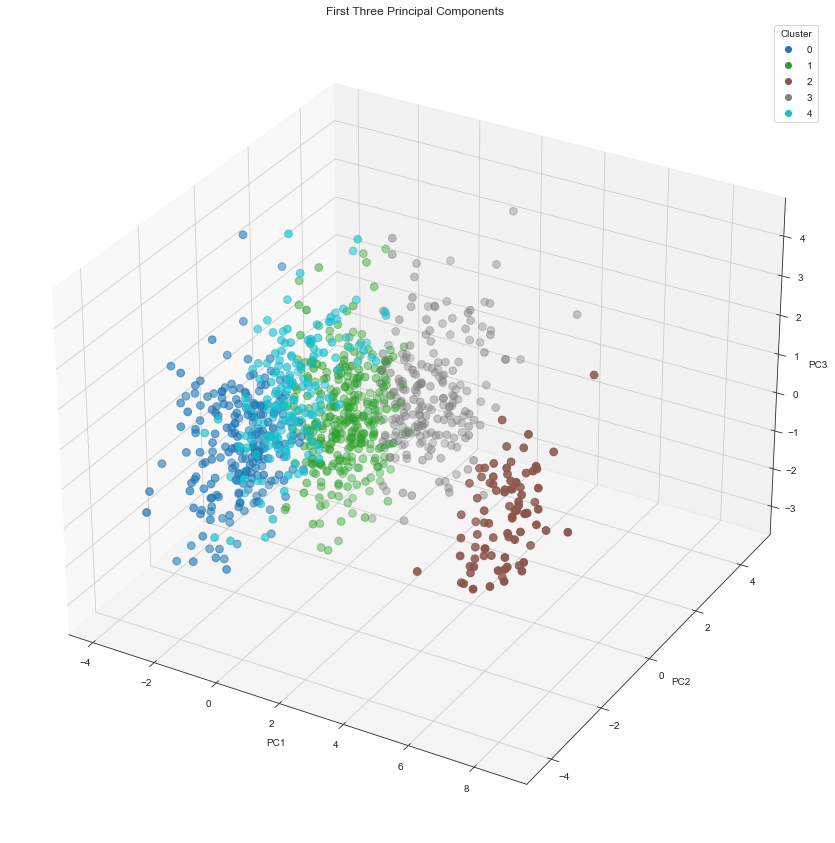

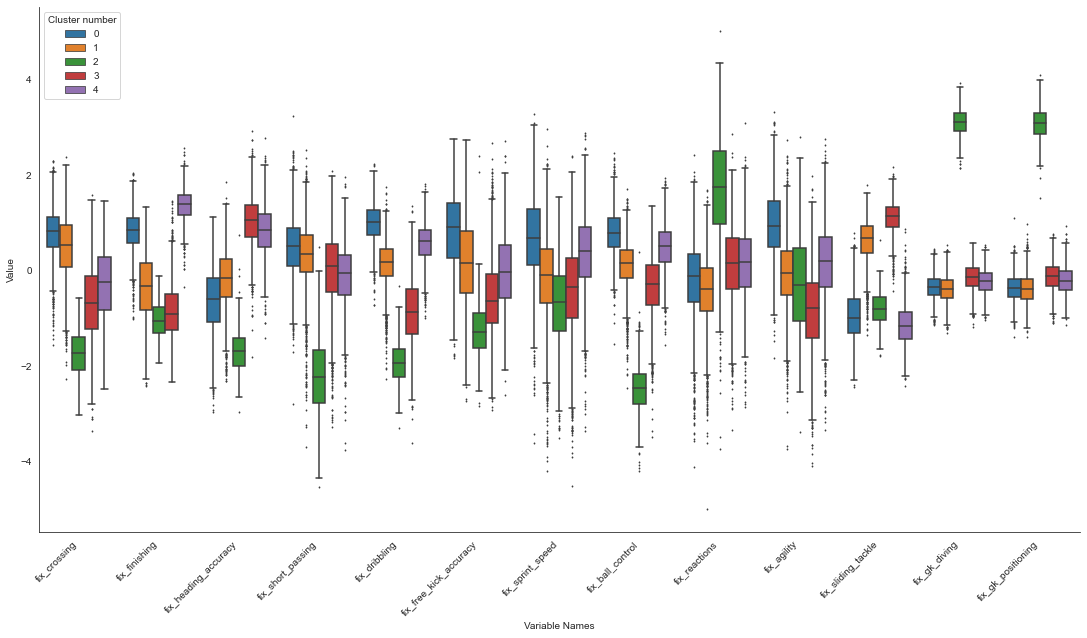

In [7]:
from clustering.kmeans import execute_k_means

variable_names = [
    'fix_crossing', 'fix_finishing', 'fix_heading_accuracy', 'fix_short_passing',
    'fix_dribbling', 'fix_free_kick_accuracy', 'fix_sprint_speed', 'fix_ball_control', 
    'fix_reactions', 'fix_agility', 'fix_sliding_tackle', 'fix_gk_diving', 'fix_gk_positioning'
]

kmeans_result = execute_k_means(
    data=soccer_data,    
    variables=variable_names,
    num_clusters=5, 
    standardize_vars=True, 
    generate_charts=True,
    save_results_to_excel=True,
    random_state=0
)


## Obtain key information about the clusters

The `execute_k_means` function returns a dictionary with additional results (beyond plots) that can be used for further analysis of the clustering.
Namely:
* `model`: The scikit-learn model that can be used for prediction on new data and also to access metrics.
* `scaler`: If standardization was used, provides the Sklearn scaling transformation. If not, will be None 
* `data`: The data used on the cluster algorithm training.
* `centroids`: A dataframe with the centroids of each cluster found.
* `cluster_n`: A dataframe containing the point counts for each cluster.
* `scores`: Clustering scores calculated for the obtained clustering.
* `cluster_plot`: Matplotlib figure object of the 3D/2D scatter plot of the principal components (PCA) with cluster colors.
* `cluster_plot_info`: Aditional informations about the cluster plot and PCA.
* `factor_plot`: Seaborn FacetGrid object with the box plots of each factor for each cluster.
* `raw_data`: Cluster assignments added back to the original data, i.e. soccer_data

**Silhouette coefficient and Calinski Harabasz scores**

These scores are generated on small and moderate datasets (impractice for large datasets) and measure the relative distance within clusters vs. across clusters. These scores by themselves are not sufficient to determine the right clustering outcome as:
- In the extreme, if all observations are in separate clusters, you will reach the optimal score
- Size and interpretation of clusters is important in the context of what the clusters will be used for



In [8]:
kmeans_result["scores"]

{'silhouette': 0.21235014145391137, 'calinski_harabasz': 1935.1283543904456}

**Number of observations in each cluster**

Very small clusters may indicate major outliers.

In [9]:
kmeans_result['cluster_n']

,Cluster_assigned,Count
0,1,3683
1,0,2192
2,3,2141
3,4,1645
4,2,921


**Get information about cluster centers**

In [10]:
kmeans_result['centroids']

,fix_crossing,fix_finishing,fix_heading_accuracy,fix_short_passing,fix_dribbling,fix_free_kick_accuracy,fix_sprint_speed,fix_ball_control,fix_reactions,fix_agility,fix_sliding_tackle,fix_gk_diving,fix_gk_positioning,Cluster Number
0,0.793317,0.819097,-0.635290,0.495784,1.007676,0.819191,0.685391,0.803401,-0.198166,0.960602,-0.934241,-0.343223,-0.359364,1
1,0.471757,-0.349625,-0.173206,0.318336,0.139159,0.146787,-0.144141,0.124131,-0.438130,-0.069872,0.616952,-0.385421,-0.389289,2
2,-1.746870,-1.041013,-1.692266,-2.228539,-1.949143,-1.256024,-0.720498,-2.456199,1.678540,-0.276457,-0.801943,3.099154,3.075797,3
3,-0.642682,-0.846979,1.029775,0.000512,-0.882562,-0.554818,-0.426843,-0.353929,0.117201,-0.861320,1.113699,-0.142972,-0.119510,4
4,-0.299226,1.375091,0.842082,-0.126539,0.584583,0.004279,0.367346,0.486523,0.152383,0.150968,-1.135025,-0.228846,-0.216123,5


**We can generate a heatmap to visualize the differences of these variables across clusters**

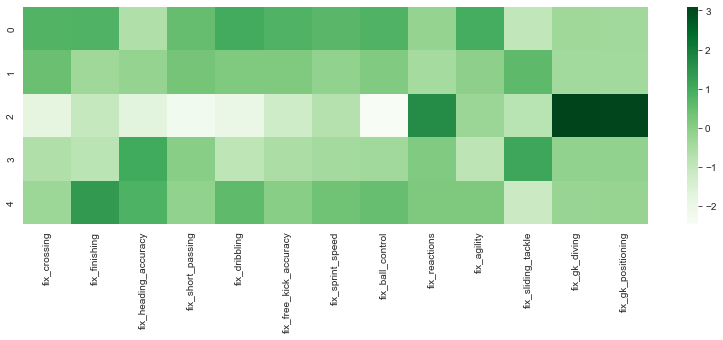

In [11]:
# PLOTTING
plt.subplots(1, 1, figsize=(14, 4))
sns.heatmap(kmeans_result['centroids'].drop(columns="Cluster Number"), cmap="Greens");

**The cluster centroids for KMeans is the average value of the variables after any standardization**. The standardized values can be difficult to interpret, and therefore calculating the centroids at the original can be helpful 

In [12]:
scaler = kmeans_result['scaler']

if scaler:
    to_scale = kmeans_result['centroids'].drop(columns="Cluster Number")
    scaled_results = pd.DataFrame(scaler.inverse_transform(X = to_scale), columns = to_scale.columns)
    scaled_results["Cluster Number"] = kmeans_result['centroids']['Cluster Number']
    
scaled_results

,fix_crossing,fix_finishing,fix_heading_accuracy,fix_short_passing,fix_dribbling,fix_free_kick_accuracy,fix_sprint_speed,fix_ball_control,fix_reactions,fix_agility,fix_sliding_tackle,fix_gk_diving,fix_gk_positioning,Cluster Number
0,11.874727,9.720899,-2.851572,14.337580,19.394782,7.103305,23.054764,18.572995,12.460415,23.734344,-21.447971,-43.156950,-42.635072,1
1,8.133116,-8.022141,3.372725,12.854659,8.524042,-1.455583,14.974871,12.137598,10.743140,13.168161,8.393236,-44.087340,-43.268269,2
2,-17.682460,-18.518508,-17.089083,-8.429474,-17.614056,-19.311667,9.360971,-12.308410,25.890830,11.049896,-18.902872,32.740450,30.050982,3
3,-4.834317,-15.572757,19.576939,10.198612,-4.264256,-10.386162,12.221264,7.608467,14.717294,5.052885,17.949429,-38.741837,-37.559913,4
4,-0.837920,18.161776,17.048706,9.136852,14.099162,-3.269531,19.956913,15.570894,14.969071,15.432596,-25.310565,-40.635185,-39.604182,5


## Examining the cluster characteristics on more variables and metrics

In many clustering applications such as Customer Segmentation, one may want to determine the clusters on a subset of key variables but still want to understand the cluster characteristics across other variables. 

Since the cluster assignment can be made available in the original dataset, groupby() and various aggregation metrics can be used. 

In [13]:
variables_to_examine = [x for x in soccer_data.columns if "fix_" in x]
", ".join(variables_to_examine)

'fix_crossing, fix_short_passing, fix_finishing, fix_volleys, fix_heading_accuracy, fix_dribbling, fix_curve, fix_free_kick_accuracy, fix_long_passing, fix_ball_control, fix_acceleration, fix_sprint_speed, fix_agility, fix_reactions, fix_balance, fix_shot_power, fix_jumping, fix_stamina, fix_strength, fix_long_shots, fix_aggression, fix_interceptions, fix_positioning, fix_vision, fix_penalties, fix_marking, fix_standing_tackle, fix_sliding_tackle, fix_gk_diving, fix_gk_handling, fix_gk_kicking, fix_gk_positioning, fix_gk_reflexes'

In [14]:
cluster_data = kmeans_result["raw_data"]

**Calculate a median**

In [15]:
cluster_data.groupby("Cluster_assigned")[variables_to_examine].median()

,fix_crossing,fix_short_passing,fix_finishing,fix_volleys,fix_heading_accuracy,fix_dribbling,fix_curve,fix_free_kick_accuracy,fix_long_passing,fix_ball_control,fix_acceleration,fix_sprint_speed,fix_agility,fix_reactions,fix_balance,fix_shot_power,fix_jumping,fix_stamina,fix_strength,fix_long_shots,fix_aggression,fix_interceptions,fix_positioning,fix_vision,fix_penalties,fix_marking,fix_standing_tackle,fix_sliding_tackle,fix_gk_diving,fix_gk_handling,fix_gk_kicking,fix_gk_positioning,fix_gk_reflexes
Cluster_assigned,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,12.212120,14.424242,10.189395,7.613636,-2.272727,19.393939,12.712120,8.310606,7.886364,18.454545,24.242424,23.113636,23.378790,13.030302,20.272727,14.757576,9.295454,13.287879,5.272727,11.030303,-1.590909,-16.795455,12.515151,12.681820,9.060606,-23.787880,-19.787880,-22.401516,-43.287879,-42.484849,-42.454545,-42.636362,-42.878790
1,8.924242,13.151515,-7.727273,-5.984848,3.727273,8.969697,2.787879,-1.424242,9.409091,12.454545,15.363636,15.393939,13.303030,11.181818,14.015152,9.833333,12.666667,18.121210,12.818182,2.212121,13.787879,9.696970,3.787879,6.803030,-0.393939,7.393939,11.303030,9.757576,-44.136364,-43.393940,-42.727270,-43.363640,-43.393939
2,-17.545450,-8.484848,-18.636364,-20.181820,-16.909090,-17.348485,-19.666667,-19.696970,-8.303030,-12.393939,9.484848,10.000000,10.818182,26.348480,10.696970,-9.181818,28.636364,4.696970,29.393939,-18.060606,-3.242424,-12.878788,-17.181820,-7.181818,-10.515150,-17.939394,-17.212121,-19.030303,32.939394,29.303030,27.212121,30.272727,34.333333
3,-5.303030,11.000000,-16.393940,-14.303030,19.878788,-4.075758,-10.348480,-11.333330,6.727273,8.333333,11.272727,13.060606,5.757576,15.075758,9.303030,6.969697,21.666670,18.500000,27.484848,-10.363636,22.272730,18.121212,-10.863640,0.651515,-2.378788,19.030303,21.181820,18.393939,-38.515150,-37.757580,-36.818182,-37.333333,-37.454545
4,-0.090909,9.818182,18.424242,12.121212,17.000000,14.424242,3.333333,-3.606061,-3.818182,15.848485,19.484848,20.393940,15.893939,15.151515,12.984848,19.151515,18.939394,14.878788,20.636364,10.590909,5.666667,-20.227273,17.060606,7.409091,14.818182,-25.696970,-22.878788,-25.727270,-40.484848,-39.621212,-39.424240,-39.545455,-39.575760


**Box and whisker plot for some variables**

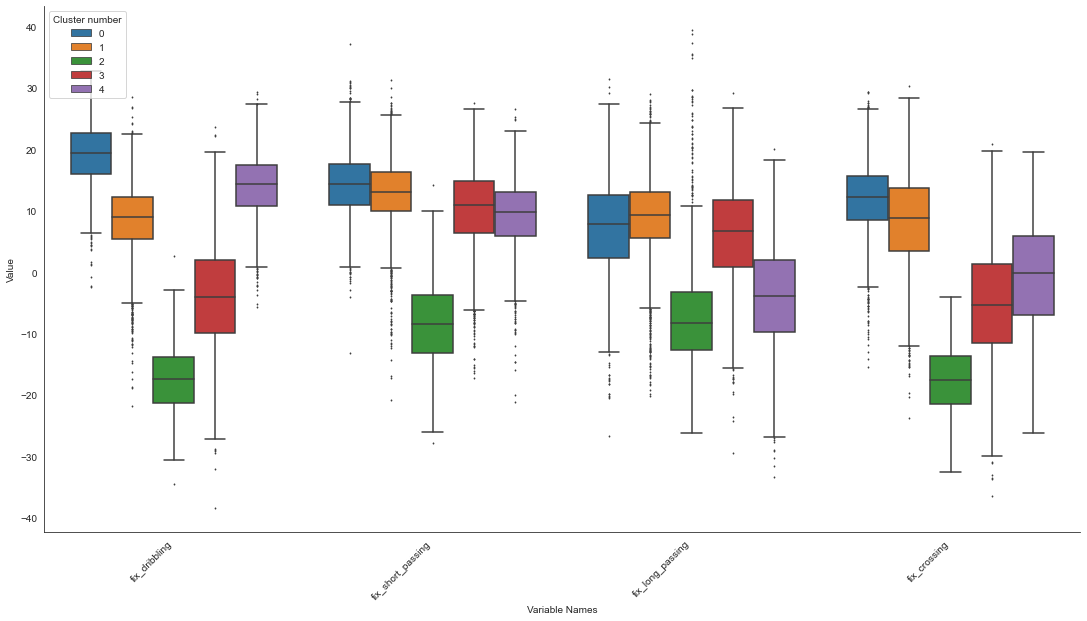

In [16]:
from clustering.clustering_eval_viz import factor_plot

factor_plot(cluster_data[['Cluster_assigned','fix_dribbling', 'fix_short_passing','fix_long_passing', 'fix_crossing']], 
            "Cluster_assigned", palette=None)

**If you have categorical variables to summarize, you can convert them to indicator variables and calculate the proportion of each category as the average of the corresponding indicator variable value. If you have ordinal variables, you can consider converting them to a numeric scale.**



**Tips**: If you have a very large number of variables, it can make sense to order the variables by similarity such that patterns are easier to visualize, e.g.:
- Manually order the data by 'attacker-skills', 'midfielder-skills', 'winger-skills', 'defender-skills', 'goalie-skills', 'physical-skills' etc.
- Use a variable clustering algorithm to identify similar variables

## Applying the trained K-means model to assign clusters to new data 

If you have new data that needs to have a cluster assigned, you would do the following:
1. Apply any standardization scaler (if used to train the model)
2. Apply the 'transform' method of the model on the data

**Below we have an example with 2 observations**

In [17]:
new_data = pd.DataFrame({
    'fix_crossing': [20,0], 
    'fix_finishing': [10,-10], 
    'fix_heading_accuracy': [-10, 20], 
    'fix_short_passing': [0,20],
    'fix_dribbling':[30, 20], 
    'fix_free_kick_accuracy':[25,15], 
    'fix_sprint_speed':[25,-25], 
    'fix_ball_control':[10,-30], 
    'fix_reactions':[10,30], 
    'fix_agility':[-10,20], 
    'fix_sliding_tackle': [-30,30],
    'fix_gk_diving': [-20, -35],
    'fix_gk_positioning': [-40, -20]    
})
new_data

,fix_crossing,fix_finishing,fix_heading_accuracy,fix_short_passing,fix_dribbling,fix_free_kick_accuracy,fix_sprint_speed,fix_ball_control,fix_reactions,fix_agility,fix_sliding_tackle,fix_gk_diving,fix_gk_positioning
0,20,10,-10,0,30,25,25,10,10,-10,-30,-20,-40
1,0,-10,20,20,20,15,-25,-30,30,20,30,-35,-20


In [18]:
# Apply scaling transformation
scaler = kmeans_result['scaler']

if scaler:
    scaled_data = pd.DataFrame(scaler.transform(new_data), columns=new_data.columns)
else:
    scaled_data = new_data.copy()

kmeans_model = kmeans_result['model']    
scored_data = new_data.copy()
scored_data['Cluster'] = kmeans_model.predict(scaled_data)

scored_data # Cluster has been added to the right of the dataset

,fix_crossing,fix_finishing,fix_heading_accuracy,fix_short_passing,fix_dribbling,fix_free_kick_accuracy,fix_sprint_speed,fix_ball_control,fix_reactions,fix_agility,fix_sliding_tackle,fix_gk_diving,fix_gk_positioning,Cluster
0,20,10,-10,0,30,25,25,10,10,-10,-30,-20,-40,0
1,0,-10,20,20,20,15,-25,-30,30,20,30,-35,-20,3


# Perform K-means analysis for a range of clusters

It is standard practice to explore several potential number of clusters in order to find an appropriate cluster outcome. We have made this easier by providing a wrapper function to the clustering function in Section 2. Excel and chart outputs are sent to the outputs folder.

Working on 2 clusters
Working on 3 clusters
Working on 4 clusters
Working on 5 clusters
Working on 6 clusters


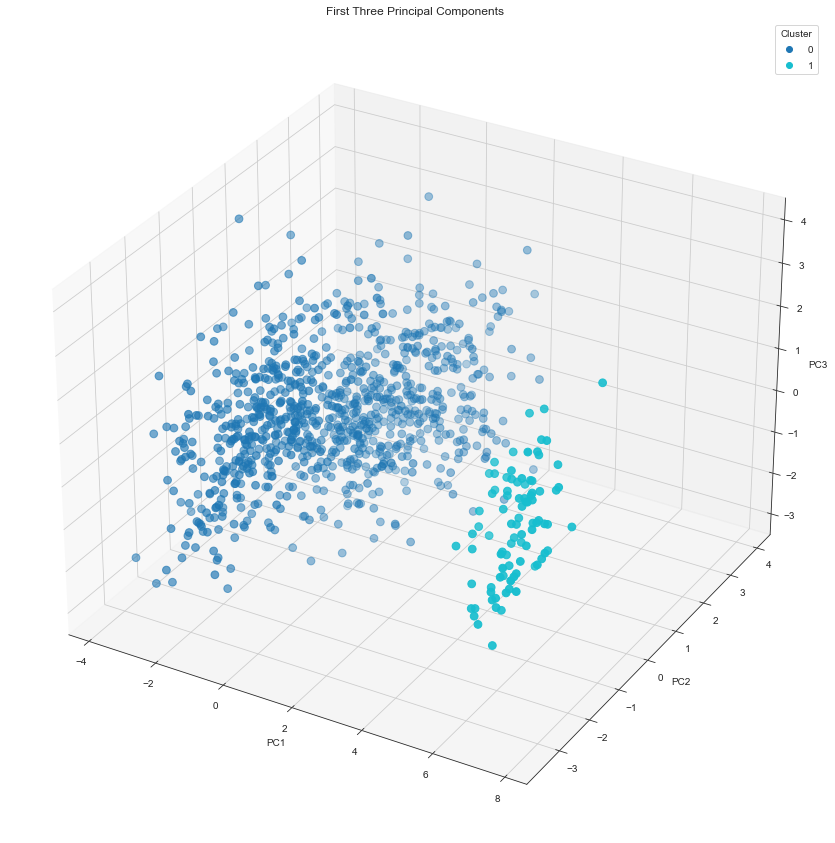

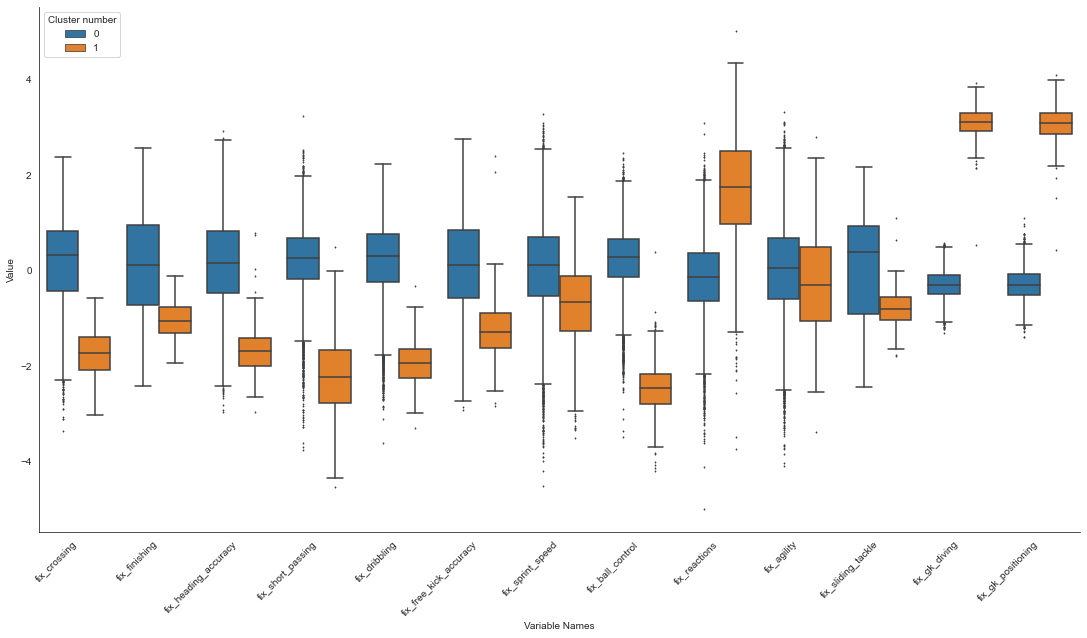

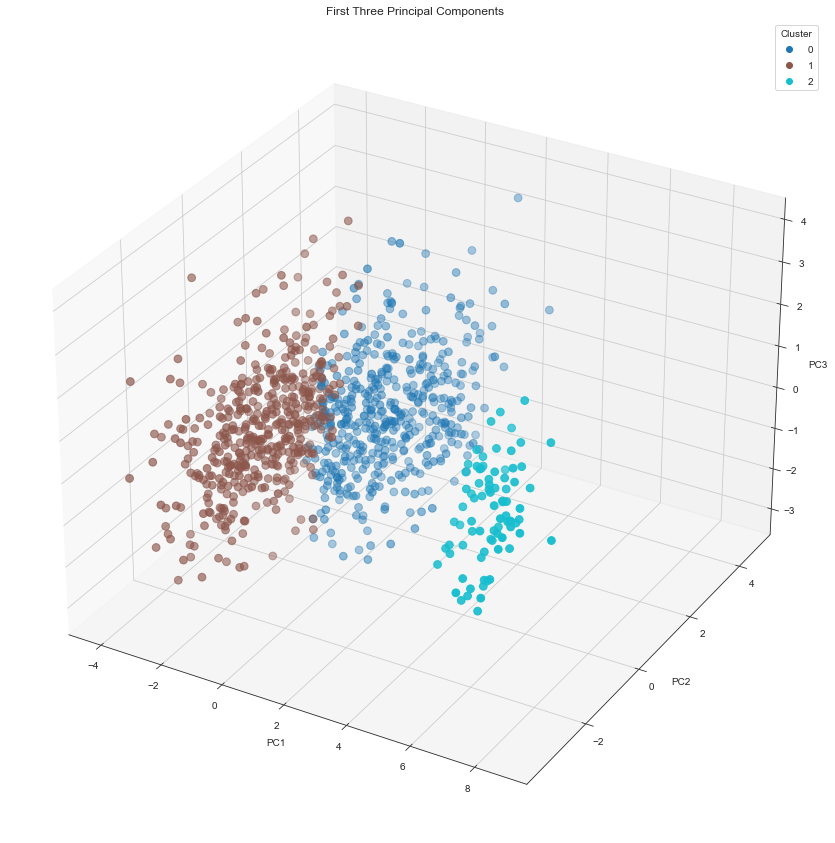

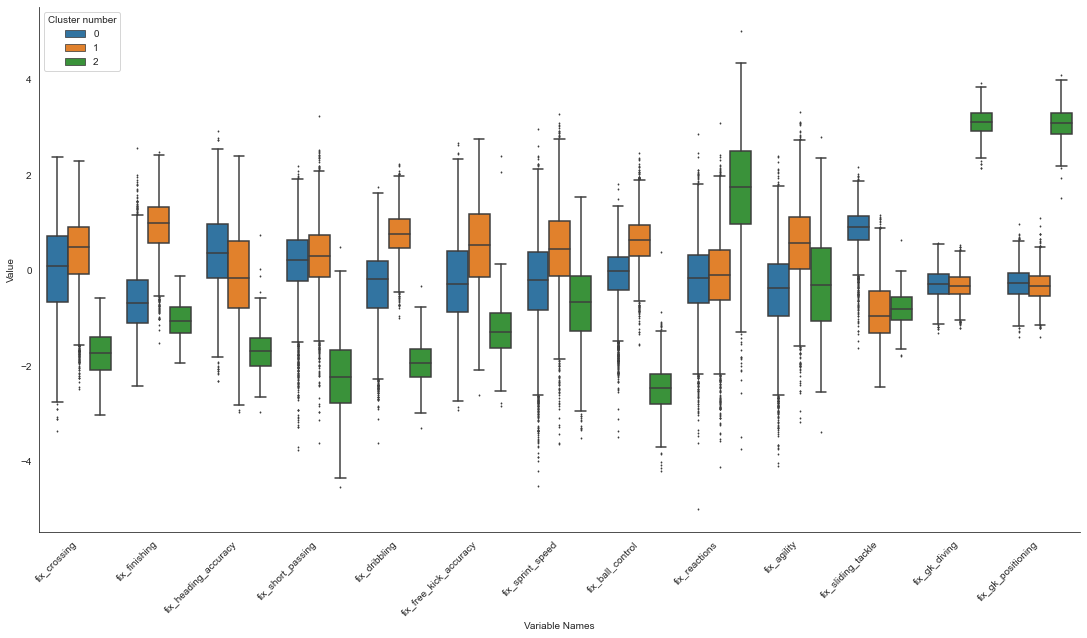

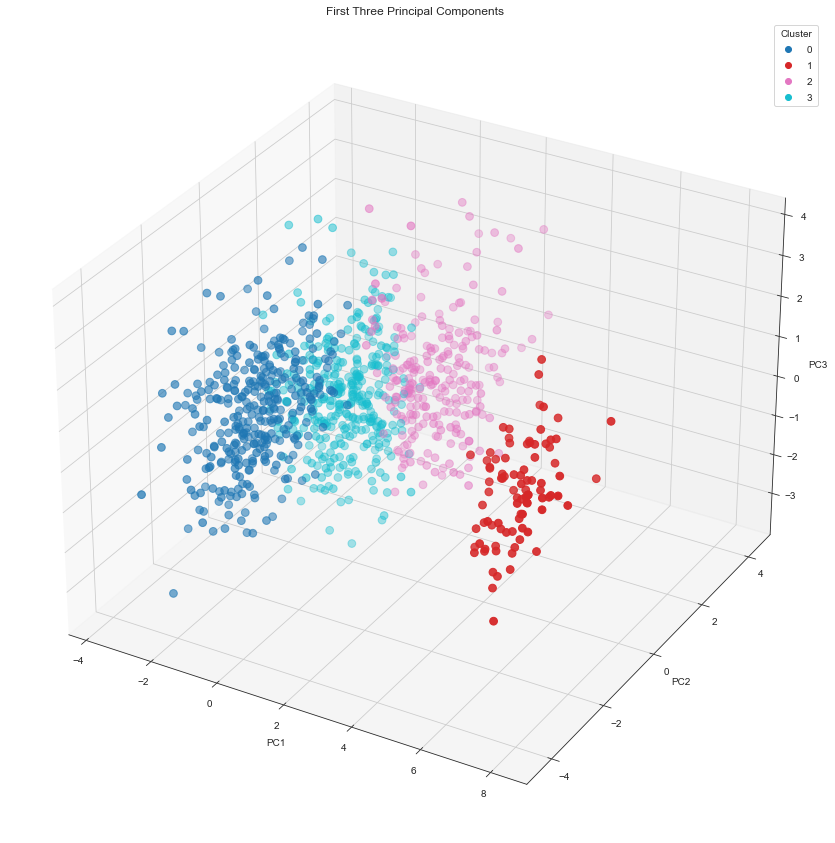

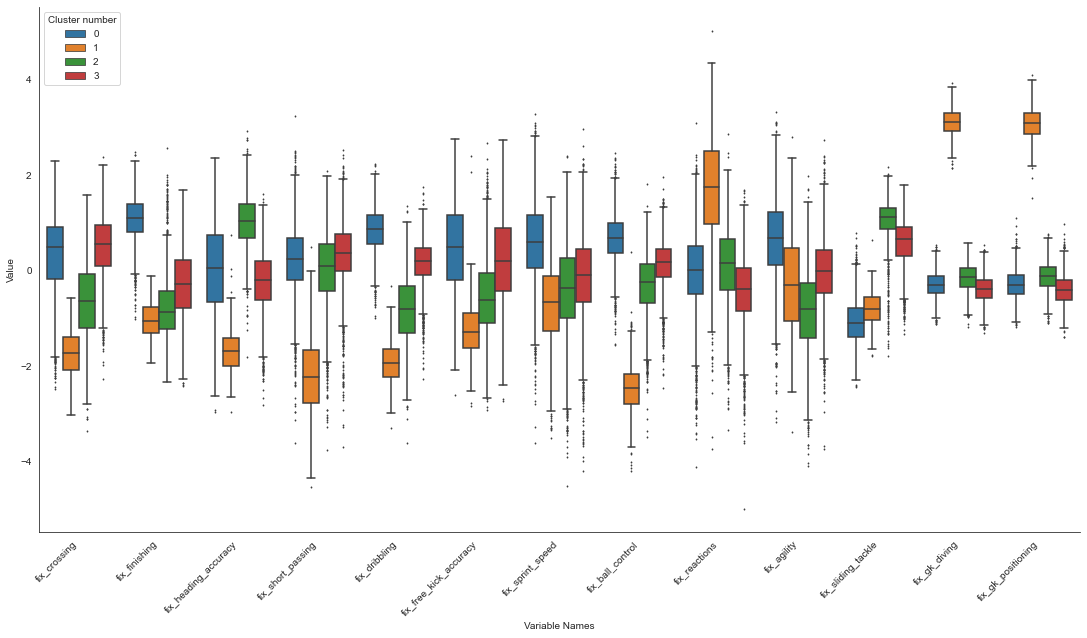

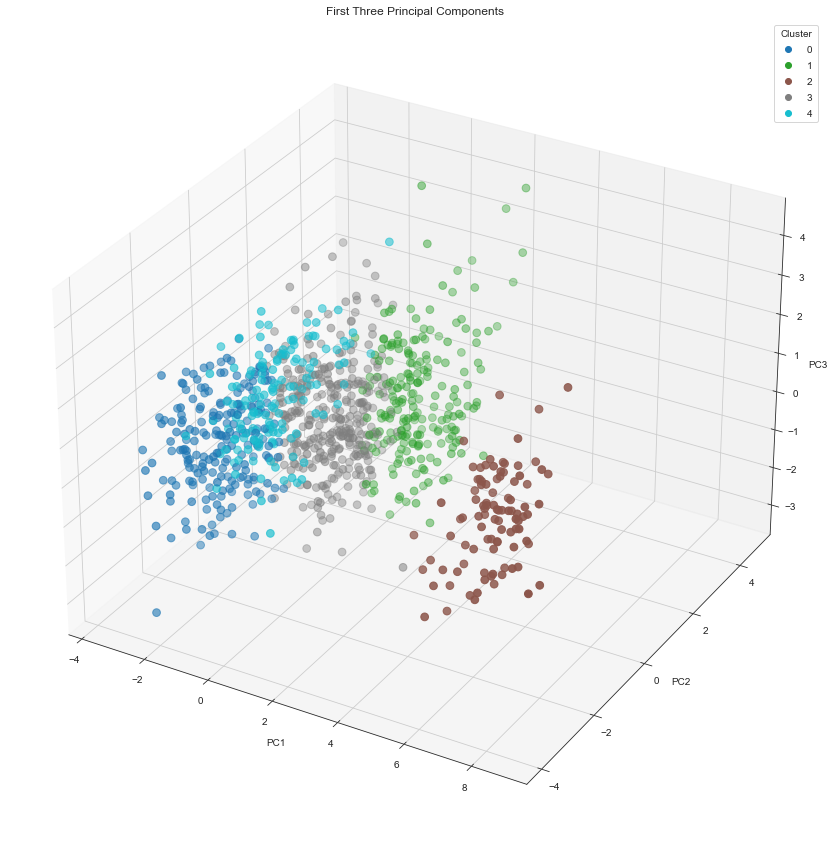

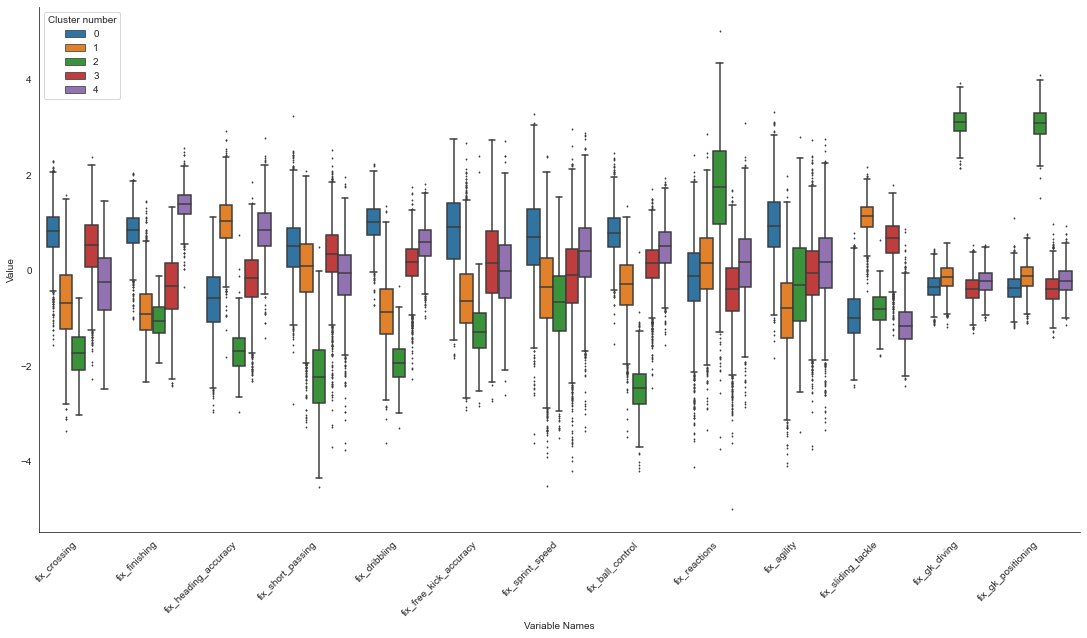

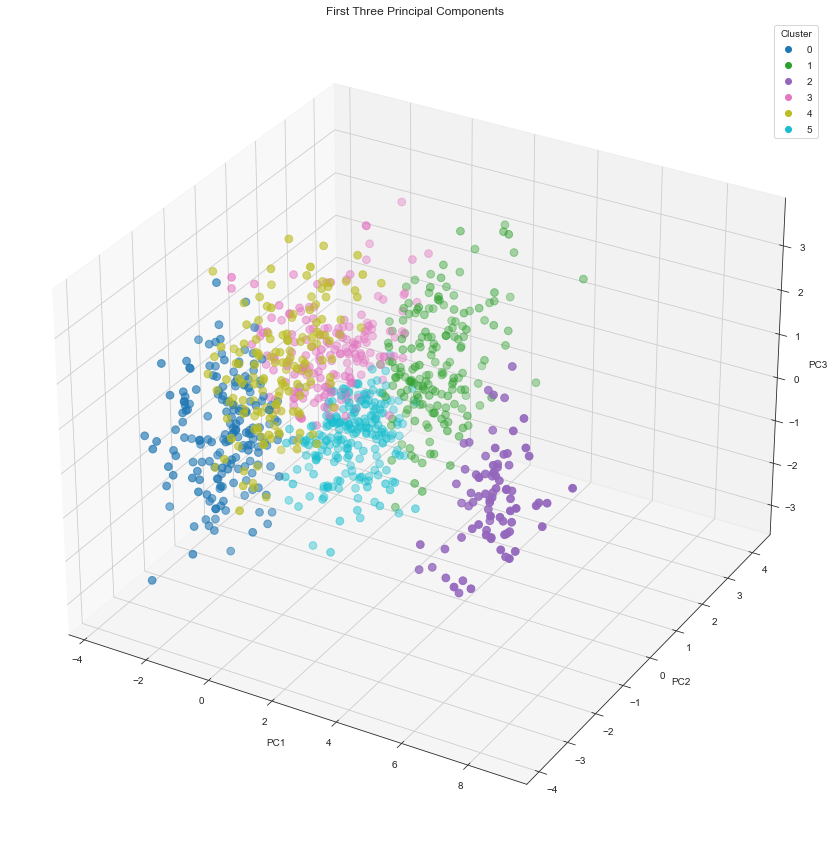

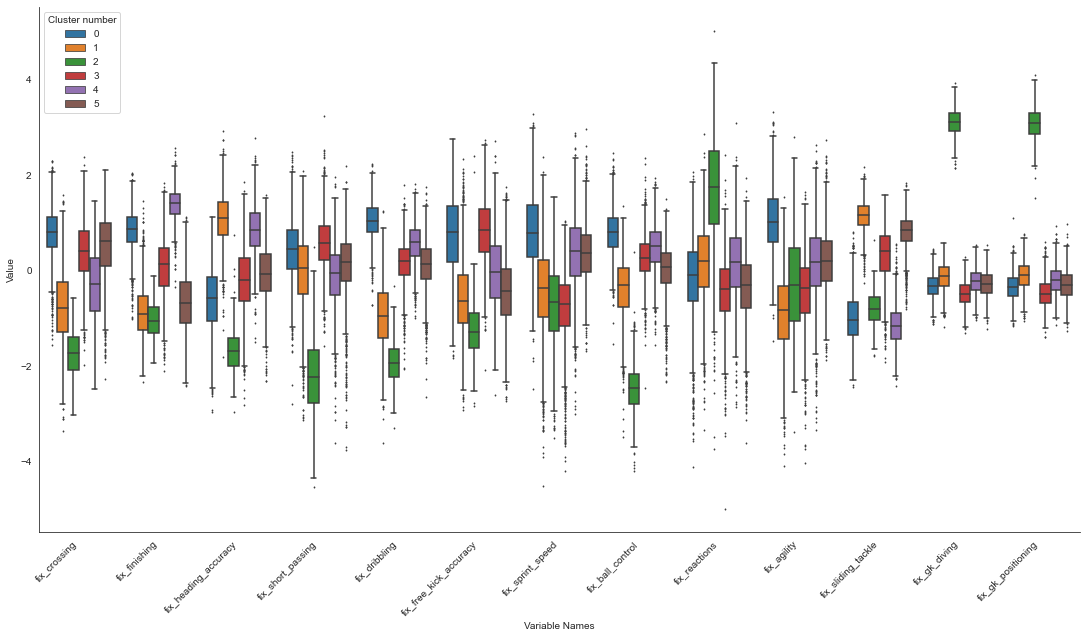

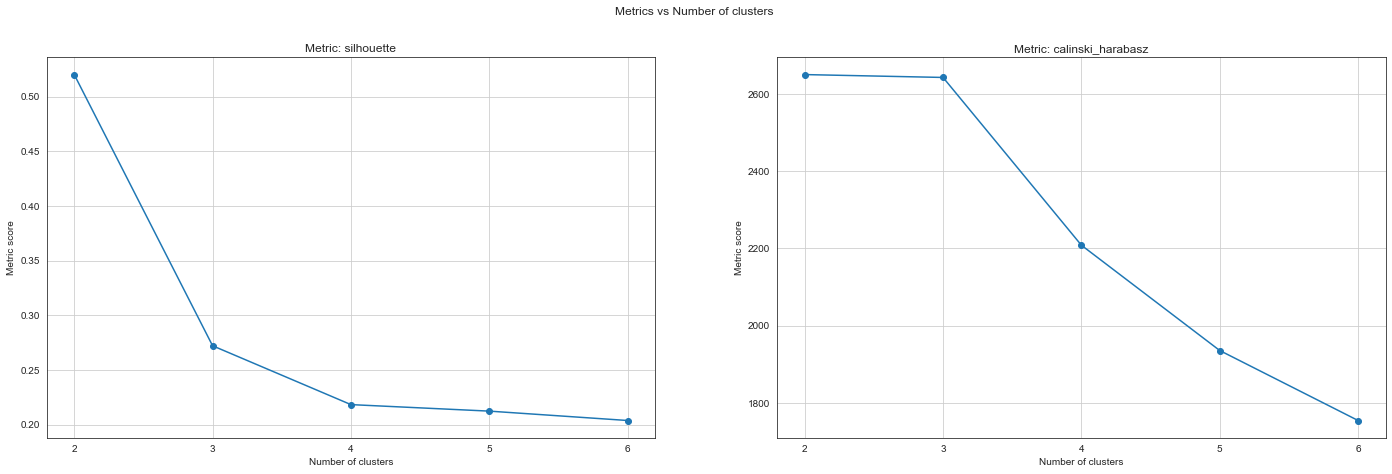

In [19]:
from clustering.kmeans import k_means_range

results = k_means_range(
    dataset=soccer_data, 
    variables=variable_names,
    min_clusters = 2, max_clusters = 6,
    standardize_vars=True, 
    generate_charts=True,
    save_results_to_excel=True,
    export_charts=True
)

## Exploring results in depth

The `k_means_range` function returns a dictionary the same information present in the outputs of `execute_k_means` for each of the number of clusters inside the range executed. See Section 2.1.

If you want to access the details for 3 clusters you should access it as a dictionary: `results[3]`

In [20]:
results[3]['cluster_n']

,Cluster_assigned,Count
0,0,5155
1,1,4506
2,2,921


# Larger datasets using MiniBatch KMeans

If you are working with larger datasets the regular KMeans can become very slow due to the sheer number of distance calculations that are needed. In this case, one can use the `MiniBatchKMeans` provided by sklearn. Read more here [sklearn MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html?highlight=kmeans#sklearn.cluster.MiniBatchKMeans)

The MiniBatch implementation  processes the data in smaller chunks. You can control the chunk size and also the maximum number of iterations via parameter keyword arguments. 

We have created a helper function MiniBatch KMeans similar to the ordinary KMeans model. With output format the same as used for the regular KMeans from above.This does include extra arguments (kwargs) that helps control chunk size and number of iterations. 

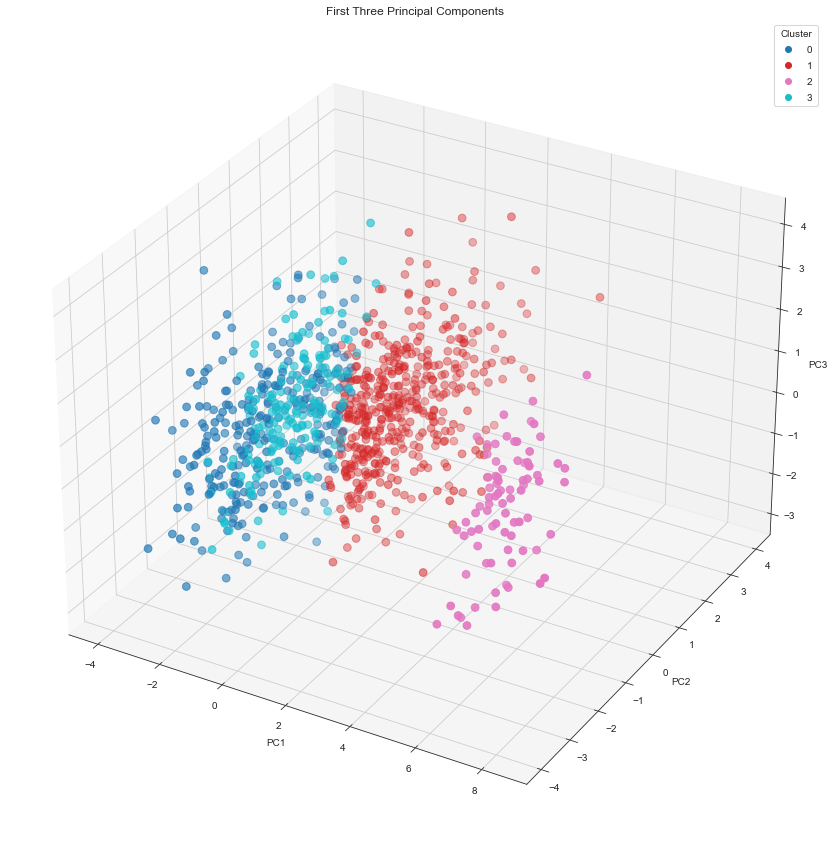

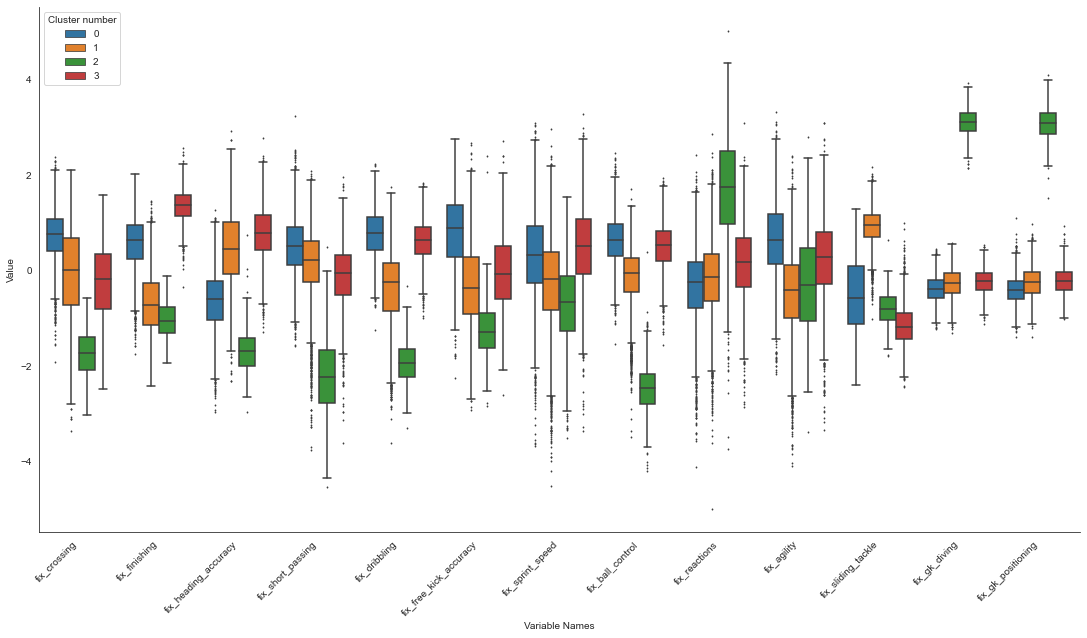

In [21]:
from clustering.mini_batch_k_means import execute_mini_batch_k_means

variable_names = [
    'fix_crossing', 'fix_finishing', 'fix_heading_accuracy', 'fix_short_passing',
    'fix_dribbling', 'fix_free_kick_accuracy', 'fix_sprint_speed', 'fix_ball_control', 
    'fix_reactions', 'fix_agility', 'fix_sliding_tackle', 'fix_gk_diving', 'fix_gk_positioning'
]

kmeans_result = execute_mini_batch_k_means(
    data=soccer_data,    
    variables=variable_names,
    num_clusters=4,
    standardize_vars=True, 
    generate_charts=True,
    save_results_to_excel=True,
    
    # extra kwargs
    max_iter=100, 
    batch_size=1024
)

## Perform MiniBatch KMeans for a range of cluster

This works the same way as for KMeans in section 3

In [22]:
from clustering.mini_batch_k_means import mini_batch_k_means_range

variable_names = [
    'crossing', 'finishing', 'heading_accuracy', 'short_passing',
    'dribbling', 'free_kick_accuracy', 'sprint_speed', 'ball_control', 
    'reactions', 'agility', 'sliding_tackle'
]

kmeans_result = mini_batch_k_means_range(
    data=soccer_data,    
    variables=variable_names,
    min_clusters=2, max_clusters=5,
    standardize_vars=True, 
    generate_charts=False,
    save_results_to_excel=False,
    
    # extra kwargs
    max_iter=100, 
    batch_size=1024
)

Working on 2 clusters
Working on 3 clusters
Working on 4 clusters
Working on 5 clusters
